In [91]:
import numpy as np
import os
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
os.chdir('../')

In [3]:
dir_apo = '/home/rishal/apo2ph4'
dir_litpcba = '/home/rishal/apo2ph4/litpcba/'

In [4]:
for root, dirs, files in os.walk(dir_apo):
    litpcba_systems=dirs
    break 
litpcba_systems.remove('litpcba') 
litpcba_systems.remove('litpcba_ligand')  
litpcba_systems.remove('litpcba_ligand_full')  
litpcba_systems.remove('litpcba_ligand_predictions')  

In [5]:
nummols_dict={'ADRB2':[17, 312296],
'ALDH1': [7168, 144818],
'ESR1_ago': [13, 5538],
'ESR1_ant': [102, 5000],
'FEN1': [369, 355513],
'GBA': [166, 295816],
'IDH1': [39, 361834],
'KAT2A': [194, 348410],
'MAPK1': [308, 62686],
'MTORC1': [97, 33065],
'OPRK1': [24, 269697],
'PKM2': [546, 245897],
'PPARG': [27, 5186],
'TP53': [79, 4208],
'VDR': [884, 355889]}

In [6]:
lit_out=open("./data/litpcba_results.txt",'w')
for dir in sorted(litpcba_systems):
    print(dir)
    lit_out.write(dir+'\n')
    num_actives=nummols_dict[dir][0]
    num_decoys=nummols_dict[dir][1] - num_actives
    for file in sorted(os.listdir(dir_litpcba+dir)):
        if file.endswith(".sdf"):
            lit_out.write(file+' ')
            output=subprocess.check_output('cat '+dir_litpcba+dir+'/'+file.split('.gz')[0]+' | grep active | sort -u | wc -l',shell=True)
            num_active_hits=int(output.decode('utf-8').strip())
            output=subprocess.check_output('cat '+dir_litpcba+dir+'/'+file.split('.gz')[0]+' | grep decoy | sort -u | wc -l',shell=True)
            num_decoy_hits=int(output.decode('utf-8').strip())
            recall=num_active_hits/num_actives
            if num_active_hits+num_decoy_hits==0:
                precision=0
            else:    
                precision=num_active_hits/(num_active_hits+num_decoy_hits)
            if precision+recall==0:
                f1=0
            else:
                f1=2*precision*recall/(precision+recall)
            enrichment=precision/(num_actives/(num_actives+num_decoys))
            hit_rate=(num_active_hits+num_decoy_hits)/(num_actives+num_decoys)
            lit_out.write(f'precision  {precision:.3f}, recall {recall:.3f}, f1 {f1:.3f}, enrichment {enrichment:.3f}, hit_rate {hit_rate:.3f}\n')
lit_out.close()

ADRB2
ALDH1
ESR1_ago
ESR1_ant
FEN1
GBA
IDH1
KAT2A
MAPK1
MTORC1
OPRK1
PKM2
PPARG
TP53
VDR


In [7]:
parent_dir = '/home/rishal/apo2ph4/litpcba_ligand_predictions/'
lit_out=open("./data/litpcba_results.txt",'a')
for dir in sorted(litpcba_systems):
    print(dir)
    lit_out.write(dir+'\n')
    num_actives=nummols_dict[dir][0]
    num_decoys=nummols_dict[dir][1] - num_actives
    for file in sorted(os.listdir(parent_dir+dir)):
        if file.endswith(".json"):
            lit_out.write(file+' ')
            output=subprocess.check_output('cat '+parent_dir+dir+'/'+file.replace('json','txt')+' | grep active | sort -u | wc -l',shell=True)
            num_active_hits=int(output.decode('utf-8').strip())
            output=subprocess.check_output('cat '+parent_dir+dir+'/'+file.replace('json','txt')+' | grep decoy | sort -u | wc -l',shell=True)
            num_decoy_hits=int(output.decode('utf-8').strip())
            recall=num_active_hits/num_actives
            if num_active_hits+num_decoy_hits==0:
                precision=0
            else:    
                precision=num_active_hits/(num_active_hits+num_decoy_hits)
            if precision+recall==0:
                f1=0
            else:
                f1=2*precision*recall/(precision+recall)
            enrichment=precision/(num_actives/(num_actives+num_decoys))
            hit_rate=(num_active_hits+num_decoy_hits)/(num_actives+num_decoys)
            lit_out.write(f'precision  {precision:.3f}, recall {recall:.3f}, f1 {f1:.3f}, enrichment {enrichment:.3f}, hit_rate {hit_rate:.3f}\n')
lit_out.close()


ADRB2
ALDH1
ESR1_ago
ESR1_ant
FEN1
GBA
IDH1
KAT2A
MAPK1
MTORC1
OPRK1
PKM2
PPARG
TP53
VDR


# load df and create latex table

In [5]:
df=pd.DataFrame(columns=['system','model','precision','recall','f1','enrichment','hit_rate'])
litpcba_data=open("./data/litpcba_results.txt",'r')
for line in litpcba_data:
    if len(line.split())==1:
        receptor_system=line.strip()
    else:
        system=receptor_system+'_'+line.split('_')[0].split('_')[0]
        model=line.split(' ')[0]
        precision=float(line.split()[2].strip(','))
        recall=float(line.split()[4].strip(','))
        f1=float(line.split()[6].strip(','))
        enrichment=float(line.split()[8].strip(','))
        hit_rate=float(line.split()[10].strip(','))
        df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
print(df)  


/tmp/ipykernel_2034364/1838094186.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_2034364/1838094186.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_2034364/1838094186.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipyke

         system                                              model precision  \
0    ADRB2_4lde                      4lde_4_model_all_points_1.sdf       0.0   
1    ADRB2_4lde                      4lde_4_model_all_points_2.sdf       0.0   
2    ADRB2_4lde                      4lde_4_model_all_points_3.sdf       0.0   
3    ADRB2_4lde                      4lde_4_model_all_points_4.sdf       0.0   
4    ADRB2_4lde                      4lde_4_model_all_points_5.sdf       0.0   
..          ...                                                ...       ...   
226  PPARG_5z5s  5z5s_ligand_min4_model_ligand_predicted_pharma...       0.0   
227   TP53_4agq  4agq_ligand_min3_model_ligand_predicted_pharma...     0.009   
228   TP53_4agq  4agq_ligand_min4_model_ligand_predicted_pharma...     0.009   
229    VDR_3a2i  3a2i_ligand_min3_model_ligand_predicted_pharma...     0.002   
230    VDR_3a2i  3a2i_ligand_min4_model_ligand_predicted_pharma...       0.0   

    recall     f1 enrichment hit_rate  

/tmp/ipykernel_2034364/1838094186.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_2034364/1838094186.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_2034364/1838094186.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipyke

In [6]:
df['num_feats']=3
df.loc[df['model'].str.contains('_4_'), 'num_feats'] = 4
df.loc[df['model'].str.contains('model\_all\_points\_1'), 'model'] = 'model_cnn_1'
df.loc[df['model'].str.contains('model\_all\_points\_2'), 'model'] = 'model_cnn_2'
df.loc[df['model'].str.contains('model\_all\_points\_3'), 'model'] = 'model_cnn_3'
df.loc[df['model'].str.contains('model\_all\_points\_4'), 'model'] = 'model_cnn_4'
df.loc[df['model'].str.contains('model\_all\_points\_5'), 'model'] = 'model_cnn_5'
df.loc[df['model'].str.contains('apo2ph4'), 'model'] = 'Apo2ph4'
df.loc[df['model'].str.contains('ligand'), 'model'] = 'model_ligand'
df['Target']='meh'
df['Target'] = df['system'].str.split('_').str[:-1].str.join('_')
df['system']=df['system'].str.split('_').str[-1]
df['system']=df['system'].str.upper()
dtypes={'system':'object','model':'object','num_feats':int,'precision':float,'recall':float,'f1':float,'enrichment':float,'hit_rate':float}
df=df.astype(dtypes)
df.set_index(['Target','system','model','num_feats'],inplace=True)
df.sort_index(inplace=True)
print(df.to_latex(index=True,float_format="%.3f",sparsify=True))

\begin{tabular}{llllrrrrr}
\toprule
    &      &              &   &  precision &  recall &    f1 &  enrichment &  hit\_rate \\
Target & system & model & num\_feats &            &         &       &             &           \\
\midrule
ADRB2 & 4LDE & Apo2ph4 & 3 &      0.000 &   0.412 & 0.000 &       3.585 &     0.115 \\
    &      & model\_cnn\_1 & 3 &      0.000 &   0.000 & 0.000 &       0.000 &     0.030 \\
    &      &              & 4 &      0.000 &   0.000 & 0.000 &       0.000 &     0.000 \\
    &      & model\_cnn\_2 & 3 &      0.000 &   0.000 & 0.000 &       0.000 &     0.000 \\
    &      &              & 4 &      0.000 &   0.000 & 0.000 &       0.000 &     0.000 \\
    &      & model\_cnn\_3 & 3 &      0.000 &   0.000 & 0.000 &       0.000 &     0.000 \\
    &      &              & 4 &      0.000 &   0.000 & 0.000 &       0.000 &     0.000 \\
    &      & model\_cnn\_4 & 3 &      0.000 &   0.118 & 0.000 &       0.571 &     0.206 \\
    &      &              & 4 &      0.000 &  

/tmp/ipykernel_2034364/4146530640.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=True,float_format="%.3f",sparsify=True))


# random selection of features

In [92]:
df=pd.DataFrame(columns=['system','model','precision','recall','f1','enrichment','hit_rate'])
litpcba_data=open("./data/litpcba_results.txt",'r')
for line in litpcba_data:
    if len(line.split())==1:
        receptor_system=line.strip()
    else:
        system=receptor_system+'_'+line.split('_')[0].split('_')[0]
        model=line.split(' ')[0]
        precision=float(line.split()[2].strip(','))
        recall=float(line.split()[4].strip(','))
        f1=float(line.split()[6].strip(','))
        enrichment=float(line.split()[8].strip(','))
        hit_rate=float(line.split()[10].strip(','))
        df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
print(df)  

/tmp/ipykernel_3409765/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_3409765/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_3409765/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipyke

         system                                              model precision  \
0    ADRB2_4lde                      4lde_4_model_all_points_1.sdf       0.0   
1    ADRB2_4lde                      4lde_4_model_all_points_2.sdf       0.0   
2    ADRB2_4lde                      4lde_4_model_all_points_3.sdf       0.0   
3    ADRB2_4lde                      4lde_4_model_all_points_4.sdf       0.0   
4    ADRB2_4lde                      4lde_4_model_all_points_5.sdf       0.0   
..          ...                                                ...       ...   
226  PPARG_5z5s  5z5s_ligand_min4_model_ligand_predicted_pharma...       0.0   
227   TP53_4agq  4agq_ligand_min3_model_ligand_predicted_pharma...     0.009   
228   TP53_4agq  4agq_ligand_min4_model_ligand_predicted_pharma...     0.009   
229    VDR_3a2i  3a2i_ligand_min3_model_ligand_predicted_pharma...     0.002   
230    VDR_3a2i  3a2i_ligand_min4_model_ligand_predicted_pharma...       0.0   

    recall     f1 enrichment hit_rate  

/tmp/ipykernel_3409765/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)
/tmp/ipykernel_3409765/4122802297.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':system,'model':model,'precision':precision,'recall':recall,'f1':f1,'enrichment':enrichment,'hit_rate':hit_rate},ignore_index=True)


In [93]:
parent_dir = '/home/rishal/apo2ph4/litpcba_ligand/'
for dir in sorted(litpcba_systems):
    print(dir)
    f1_scores=[]
    num_actives=nummols_dict[dir][0]
    num_decoys=nummols_dict[dir][1] - num_actives
    receptor_current=dir
    for file in sorted(os.listdir(parent_dir+dir)):
        if receptor_current==dir:
            receptor_current=file.split('_')[0]
        else:
            if file.split('_')[0]!=receptor_current:
                if len(f1_scores)>0:
                    f1_scores=np.array(f1_scores)
                    df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True) 
                f1_scores=[]
                receptor_current=dir
        if file.endswith(".txt") and len(file.split('_'))>2 and int(file.split('_')[2])<=5:
            output=subprocess.check_output('cat '+parent_dir+dir+'/'+file.replace('json','txt')+' | grep active | sort -u | wc -l',shell=True)
            num_active_hits=int(output.decode('utf-8').strip())
            output=subprocess.check_output('cat '+parent_dir+dir+'/'+file.replace('json','txt')+' | grep decoy | sort -u | wc -l',shell=True)
            num_decoy_hits=int(output.decode('utf-8').strip())
            recall=num_active_hits/num_actives
            if num_active_hits+num_decoy_hits==0:
                precision=0
            else:    
                precision=num_active_hits/(num_active_hits+num_decoy_hits)
            if precision+recall==0:
                f1=0
            else:
                f1=2*precision*recall/(precision+recall)
            f1_scores.append(f1)
    if len(f1_scores)>0:
        f1_scores=np.array(f1_scores)
        df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True) 
    

ADRB2


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


ALDH1


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


ESR1_ago


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


ESR1_ant


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)
/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


FEN1
GBA


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


IDH1


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


KAT2A


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


MAPK1


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


MTORC1


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


OPRK1


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


PKM2


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


PPARG


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)
/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


TP53


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


VDR


/tmp/ipykernel_3409765/1782081091.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'system':dir+'_'+receptor_current,'model':'Ligand_best','method':'Ligand_best','f1':np.max(f1_scores)},ignore_index=True)


In [94]:
df = df.astype({'f1': float})
df['method']='PharmRL_CNN'
df.loc[df['model'].str.contains('apo2ph4'),'method']='Apo2ph4'
df.loc[df['model'].str.contains('ligand_min3'),'method']='PharmRL_Ligand_3'
df.loc[df['model'].str.contains('ligand_min4'),'method']='PharmRL_Ligand_4'
df.loc[df['model'].str.contains('Ligand_best'),'method']='Ligand_best'
print(df[df['model'].str.contains('apo2ph4')])

            system               model precision recall     f1 enrichment  \
5       ADRB2_4lde    4lde_apo2ph4.sdf       0.0  0.412  0.000      3.585   
16      ALDH1_5ac2    5ac2_apo2ph4.sdf     0.067  0.003  0.007      1.347   
27   ESR1_ago_2qr9    2qr9_apo2ph4.sdf     0.006  0.231  0.013      2.748   
38   ESR1_ant_2pog    2pog_apo2ph4.sdf     0.032  0.157  0.053      1.565   
49   ESR1_ant_6b0f    6b0f_apo2ph4.sdf     0.036  0.078  0.049      1.751   
60       FEN1_5fv7    5fv7_apo2ph4.sdf     0.002  0.057  0.004      1.764   
71        GBA_3rik    3rik_apo2ph4.sdf     0.003  0.054  0.006      5.633   
82       IDH1_4i3l    4i3l_apo2ph4.sdf       0.0    0.0  0.000        0.0   
93       IDH1_5tqh    5tqh_apo2ph4.sdf       0.0  0.231  0.000      1.731   
99      KAT2A_5mlj  5mlj_4_apo2ph4.sdf     0.001  0.139  0.001      1.324   
105     KAT2A_5mlj  5mlj_5_apo2ph4.sdf     0.001  0.057  0.002      1.387   
116     MAPK1_3w55    3w55_apo2ph4.sdf     0.007  0.182  0.013       1.42   

In [95]:
print(df[df['method']=='Apo2ph4'])

            system               model precision recall     f1 enrichment  \
5       ADRB2_4lde    4lde_apo2ph4.sdf       0.0  0.412  0.000      3.585   
16      ALDH1_5ac2    5ac2_apo2ph4.sdf     0.067  0.003  0.007      1.347   
27   ESR1_ago_2qr9    2qr9_apo2ph4.sdf     0.006  0.231  0.013      2.748   
38   ESR1_ant_2pog    2pog_apo2ph4.sdf     0.032  0.157  0.053      1.565   
49   ESR1_ant_6b0f    6b0f_apo2ph4.sdf     0.036  0.078  0.049      1.751   
60       FEN1_5fv7    5fv7_apo2ph4.sdf     0.002  0.057  0.004      1.764   
71        GBA_3rik    3rik_apo2ph4.sdf     0.003  0.054  0.006      5.633   
82       IDH1_4i3l    4i3l_apo2ph4.sdf       0.0    0.0  0.000        0.0   
93       IDH1_5tqh    5tqh_apo2ph4.sdf       0.0  0.231  0.000      1.731   
99      KAT2A_5mlj  5mlj_4_apo2ph4.sdf     0.001  0.139  0.001      1.324   
105     KAT2A_5mlj  5mlj_5_apo2ph4.sdf     0.001  0.057  0.002      1.387   
116     MAPK1_3w55    3w55_apo2ph4.sdf     0.007  0.182  0.013       1.42   

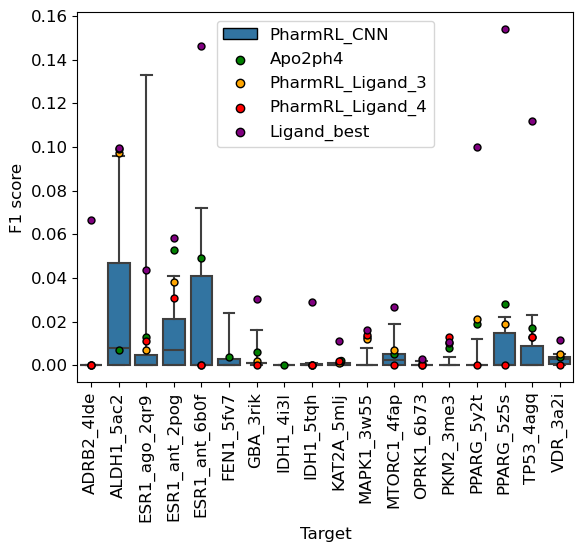

In [96]:
matplotlib.rcParams.update({'font.size': 12})
ax=sns.boxplot(x='system',y='f1',data=df[df['method']=='PharmRL_CNN'],hue='method',whis=[0,100])
#ax=sns.stripplot(x='system',y='f1',data=df,hue='method',dodge=True)

sns.stripplot(x='system',y='f1',data=df[df['method']=='Apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['green'])
sns.stripplot(x='system',y='f1',data=df[df['method']=='PharmRL_Ligand_3'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
sns.stripplot(x='system',y='f1',data=df[df['method']=='PharmRL_Ligand_4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['red'])
sns.stripplot(x='system',y='f1',data=df[df['method']=='Ligand_best'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['purple'])
handles, labels = ax.get_legend_handles_labels()
for ha in handles:
    ha.set_edgecolor('black')
    ha.set_linewidth(1)
lgd=ax.legend(handles, labels, loc='upper center')
#ax.hlines(1,-1,8,linestyles='dashed',colors='black')

ax.set_ylabel('F1 score')
ax.set_xlabel('Target')
plt.xticks(rotation='vertical')
plt.savefig('LitPCBA_f1_results.png',bbox_inches='tight')

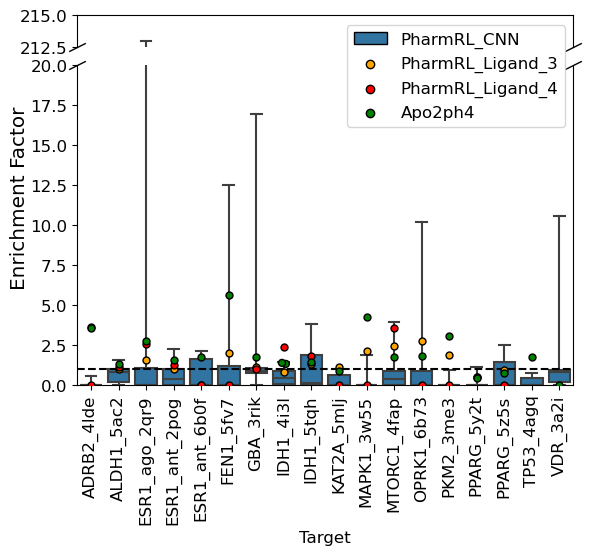

In [114]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1, 10]})
fig.subplots_adjust(hspace=0.1) 

sns.boxplot(x='system',y='enrichment',data=df[df['method']=='PharmRL_CNN'],hue='method',whis=[0,100],ax=ax1)
sns.boxplot(x='system',y='enrichment',data=df[df['method']=='PharmRL_CNN'],hue='method',whis=[0,100],ax=ax2)
#ax=sns.stripplot(x='system',y='f1',data=df,hue='method',dodge=True)
sns.stripplot(x='system',y='enrichment',data=df[df['method']=='PharmRL_Ligand_3'],ax=ax2,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
sns.stripplot(x='system',y='enrichment',data=df[df['method']=='PharmRL_Ligand_4'],ax=ax2,hue='method',linewidth=1,edgecolor='black',palette=['red'])
sns.stripplot(x='system',y='enrichment',data=df[df['method']=='Apo2ph4'],ax=ax2,hue='method',linewidth=1,edgecolor='black',palette=['green'])

handles, labels = ax2.get_legend_handles_labels()
for ha in handles:
    ha.set_edgecolor('black') 
    ha.set_linewidth(1)
lgd=ax2.legend(handles, labels, loc='upper right',bbox_to_anchor=(1, 1.15))
ax1.legend_.remove()
#ax2.legend_.remove()
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().get_label().set_visible(False)
#ax.hlines(1,-1,8,linestyles='dashed',colors='black')
ax1.set_ylim(212.5,215)
ax2.set_ylim(0,20)
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.hlines(1,-0.5,17.5,linestyles='dashed',colors='black')
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
#ax2.set_ylabel('Enrichment Factor')
ax2.axes.get_yaxis().get_label().set_visible(False)
plt.xticks(rotation='vertical')
ax2.set_xlabel('Target',fontsize=12)
fig.supylabel('Enrichment Factor')
plt.savefig('LitPCBA_enrichment_results.png',bbox_inches='tight')

In [49]:
ax=sns.boxplot(x='system',y='precision',data=df[df['method']=='pharmnn'],hue='method',whis=[0,100])
sns.stripplot(x='system',y='precision',data=df[df['method']=='apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
plt.xticks(rotation='vertical')

ValueError: min() arg is an empty sequence

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'ADRB2_4lde'),
  Text(1, 0, 'ALDH1_5ac2'),
  Text(2, 0, 'ESR1_ago_2qr9'),
  Text(3, 0, 'ESR1_ant_2pog'),
  Text(4, 0, 'ESR1_ant_6b0f'),
  Text(5, 0, 'FEN1_5fv7'),
  Text(6, 0, 'GBA_3rik'),
  Text(7, 0, 'IDH1_4i3l'),
  Text(8, 0, 'IDH1_5tqh'),
  Text(9, 0, 'KAT2A_5mlj'),
  Text(10, 0, 'MAPK1_3w55'),
  Text(11, 0, 'MTORC1_4fap'),
  Text(12, 0, 'OPRK1_6b73'),
  Text(13, 0, 'PKM2_3me3'),
  Text(14, 0, 'PPARG_5y2t'),
  Text(15, 0, 'PPARG_5z5s'),
  Text(16, 0, 'TP53_4agq'),
  Text(17, 0, 'VDR_3a2i')])

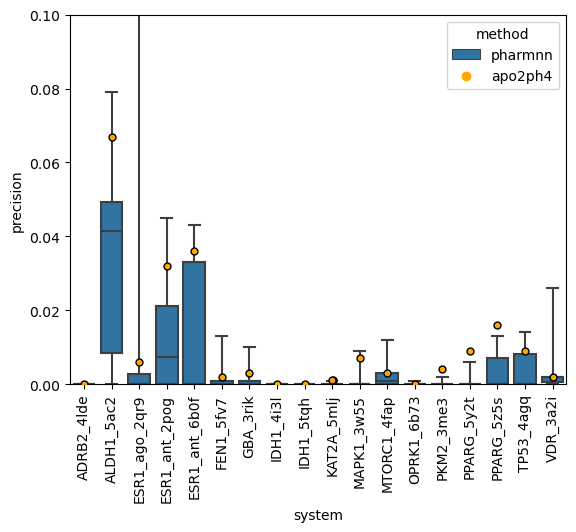

In [20]:
ax=sns.boxplot(x='system',y='precision',data=df[df['method']=='pharmnn'],hue='method',whis=[0,100])
sns.stripplot(x='system',y='precision',data=df[df['method']=='apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
ax.set_ylim(0,0.1)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'ADRB2_4lde'),
  Text(1, 0, 'ALDH1_5ac2'),
  Text(2, 0, 'ESR1_ago_2qr9'),
  Text(3, 0, 'ESR1_ant_2pog'),
  Text(4, 0, 'ESR1_ant_6b0f'),
  Text(5, 0, 'FEN1_5fv7'),
  Text(6, 0, 'GBA_3rik'),
  Text(7, 0, 'IDH1_4i3l'),
  Text(8, 0, 'IDH1_5tqh'),
  Text(9, 0, 'KAT2A_5mlj'),
  Text(10, 0, 'MAPK1_3w55'),
  Text(11, 0, 'MTORC1_4fap'),
  Text(12, 0, 'OPRK1_6b73'),
  Text(13, 0, 'PKM2_3me3'),
  Text(14, 0, 'PPARG_5y2t'),
  Text(15, 0, 'PPARG_5z5s'),
  Text(16, 0, 'TP53_4agq'),
  Text(17, 0, 'VDR_3a2i')])

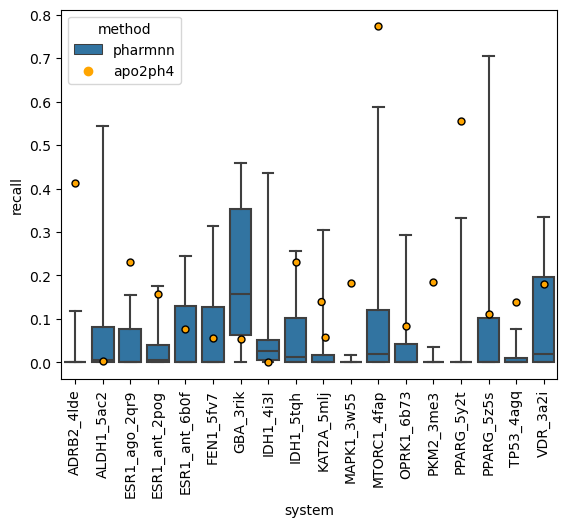

In [21]:
ax=sns.boxplot(x='system',y='recall',data=df[df['method']=='pharmnn'],hue='method',whis=[0,100])
sns.stripplot(x='system',y='recall',data=df[df['method']=='apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'ADRB2_4lde'),
  Text(1, 0, 'ALDH1_5ac2'),
  Text(2, 0, 'ESR1_ago_2qr9'),
  Text(3, 0, 'ESR1_ant_2pog'),
  Text(4, 0, 'ESR1_ant_6b0f'),
  Text(5, 0, 'FEN1_5fv7'),
  Text(6, 0, 'GBA_3rik'),
  Text(7, 0, 'IDH1_4i3l'),
  Text(8, 0, 'IDH1_5tqh'),
  Text(9, 0, 'KAT2A_5mlj'),
  Text(10, 0, 'MAPK1_3w55'),
  Text(11, 0, 'MTORC1_4fap'),
  Text(12, 0, 'OPRK1_6b73'),
  Text(13, 0, 'PKM2_3me3'),
  Text(14, 0, 'PPARG_5y2t'),
  Text(15, 0, 'PPARG_5z5s'),
  Text(16, 0, 'TP53_4agq'),
  Text(17, 0, 'VDR_3a2i')])

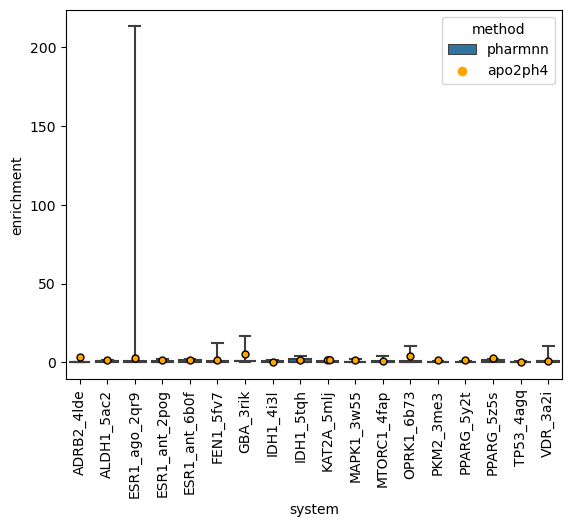

In [22]:
ax=sns.boxplot(x='system',y='enrichment',data=df[df['method']=='pharmnn'],hue='method',whis=[0,100])
sns.stripplot(x='system',y='enrichment',data=df[df['method']=='apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
plt.xticks(rotation='vertical')

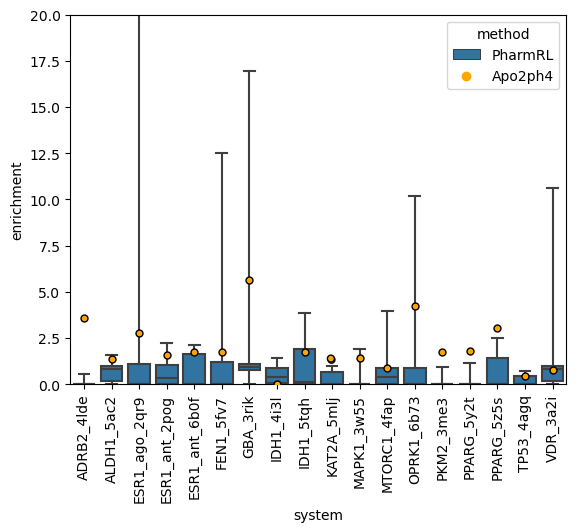

In [14]:
ax=sns.boxplot(x='system',y='enrichment',data=df[df['method']=='PharmRL'],hue='method',whis=[0,100])
sns.stripplot(x='system',y='enrichment',data=df[df['method']=='Apo2ph4'],ax=ax,hue='method',linewidth=1,edgecolor='black',palette=['orange'])
ax.set_ylim(0,20)
plt.xticks(rotation='vertical')
plt.savefig('enrichment_litpcba.png')

Generate ligand pharmacophore queries

In [34]:
for system in df['system'].unique():
    system_split=system.split('_')
    if len(system_split)==2:
        system_prot=system.split('_')[0]
    else:
        system_prot=system.split('_')[0]+'_'+system.split('_')[1]
    system_pdb=system.split('_')[-1]
    print(system_prot,system_pdb)
    receptor_file=dir_apo+'/'+system_prot+'/'+system_pdb+'_protein.mol2'
    ligand_file=dir_apo+'/'+system_prot+'/'+system_pdb+'_ligand.mol2'
    
    if not os.path.isdir(dir_apo+'/litpcba_ligand_full/'+system_prot):
        os.mkdir(dir_apo+'/litpcba_ligand_full/'+system_prot)
    json_file=dir_apo+'/litpcba_ligand_full/'+system_prot+'/'+system_pdb+'_pharmit.json'
    print(receptor_file,ligand_file,json_file)
    os.system(f'./pharmit pharma -receptor {receptor_file} -in {ligand_file} -out {json_file}')
    #os.system(f'python genqueries.py {json_file}')

ADRB2 4lde
/home/rishal/apo2ph4/ADRB2/4lde_protein.mol2 /home/rishal/apo2ph4/ADRB2/4lde_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/ADRB2/4lde_pharmit.json
ALDH1 5ac2
/home/rishal/apo2ph4/ALDH1/5ac2_protein.mol2 /home/rishal/apo2ph4/ALDH1/5ac2_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/ALDH1/5ac2_pharmit.json
ESR1_ago 2qr9
/home/rishal/apo2ph4/ESR1_ago/2qr9_protein.mol2 /home/rishal/apo2ph4/ESR1_ago/2qr9_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/ESR1_ago/2qr9_pharmit.json
ESR1_ant 2pog
/home/rishal/apo2ph4/ESR1_ant/2pog_protein.mol2 /home/rishal/apo2ph4/ESR1_ant/2pog_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/ESR1_ant/2pog_pharmit.json
ESR1_ant 6b0f
/home/rishal/apo2ph4/ESR1_ant/6b0f_protein.mol2 /home/rishal/apo2ph4/ESR1_ant/6b0f_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/ESR1_ant/6b0f_pharmit.json
FEN1 5fv7
/home/rishal/apo2ph4/FEN1/5fv7_protein.mol2 /home/rishal/apo2ph4/FEN1/5fv7_ligand.mol2 /home/rishal/apo2ph4/litpcba_ligand_full/F